# Prediction of Fish Weight using Linear Regression Model

In [22]:
#Import required libraries

import pandas as pd
import missingno as mg
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Importing Dataset

In [2]:
df = pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.value_counts()

Species    Weight  Length1  Length2  Length3  Height   Width 
Bream      242.0   23.2     25.4     30.0     11.5200  4.0200    1
Pike       500.0   42.0     45.0     48.0     6.9600   4.8960    1
           200.0   30.0     32.3     34.8     5.5680   3.3756    1
           300.0   31.7     34.0     37.8     5.7078   4.1580    1
                   32.7     35.0     38.8     5.9364   4.3844    1
                                                                ..
Perch      85.0    18.2     20.0     21.0     5.0820   2.7720    1
           100.0   16.2     18.0     19.2     5.2224   3.3216    1
           110.0   19.0     21.0     22.5     5.6925   3.5550    1
                   20.0     22.0     23.5     5.5225   3.9950    1
Whitefish  1000.0  37.3     40.0     43.5     12.3540  6.5250    1
Length: 159, dtype: int64

In [4]:
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

## Identifying Missing Values

<AxesSubplot:>

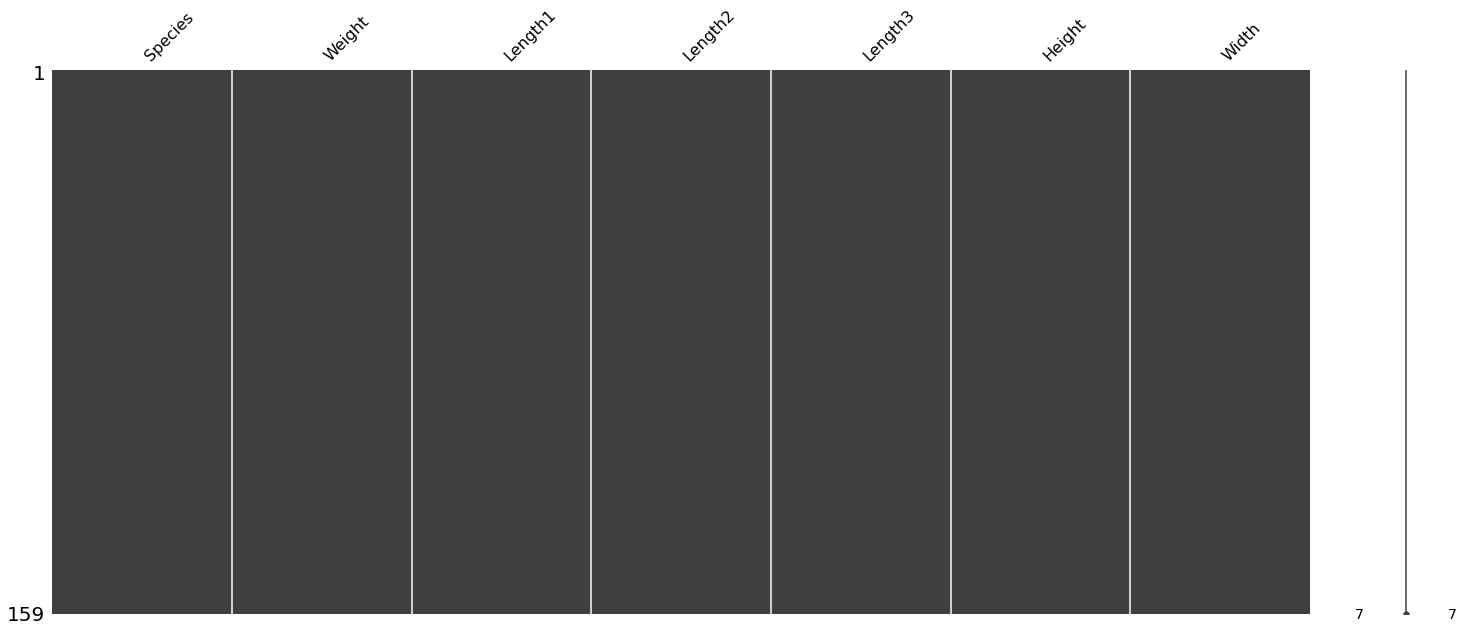

In [5]:
mg.matrix(df)

#### From the above plot we can see that no missing values are found

### 

## 

## Exploratory Data Analysis

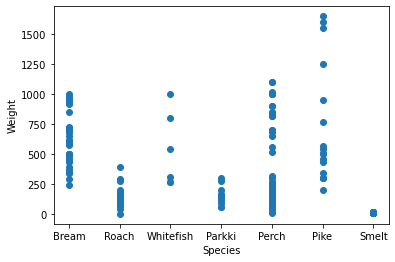

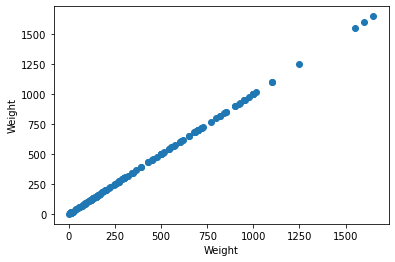

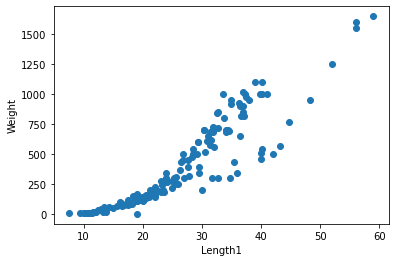

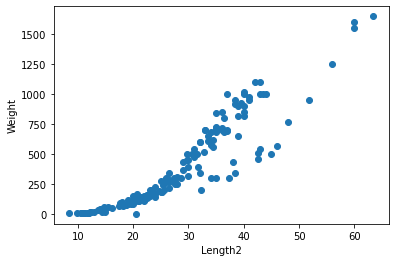

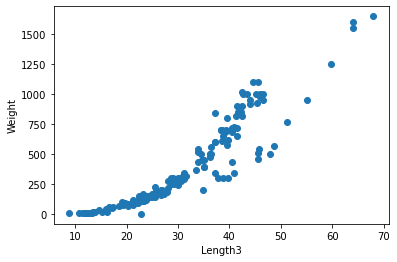

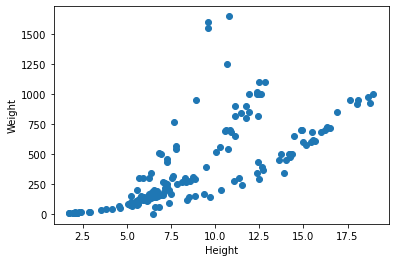

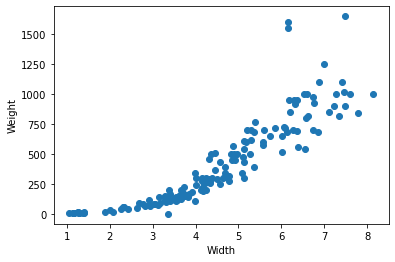

In [6]:
#Creating a scatter plot of each variable against 'Weight' to understand correlation

df1 = df.iloc[:,:]
for a in df1.columns:
    plt.figure()
    plt.scatter(df1[a],df1['Weight'])
    plt.xlabel(a)
    plt.ylabel('Weight')

#### The above plot show that 'Length', 'Height' and 'Width' are non-linearly co-related with 'Weight'

<AxesSubplot:>

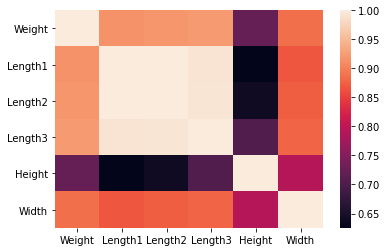

In [23]:
sns.heatmap(df1.corr())

## 

## 


## Data Preprocessing

In [7]:
#Convert categorical variable using one hot encoding

species_dummies = pd.get_dummies(df['Species'])

In [8]:
df = pd.concat((df, species_dummies), axis = 1)

In [9]:
df.drop(columns = 'Species', inplace = True)

## 

## Modelling

In [16]:
# Define X and Y variables

X = df.drop(columns = 'Weight', axis = 1)
y = df['Weight']

In [20]:
# Generating ANOVA table using statsmodel.api

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           6.85e-82
Time:                        19:39:47   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -711.3869     47.172    -15.081      0.000    -804.611    -618.163
Length1      -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Length2       79.8886     45.718      1.747      0.083     -10.461     170.238
Length3       32.5354     29.300      1.110      0.269     -25.369      90.439
Height         5.2510     13.056      0.402      0.688     -20.551      31.053
Width         -0.5154     23.913     -0.022      0.983     -47.773      46.742
Bream       -206.9452     89.978     -2.300      0.023    -384.762     -29.128
Parkki       -42.2226     41.601     -1.015      0.312    -124.436      39.991
Perch        -68.9963     37.083     -1.861      0.065    -142.281       4.288
Pike        -415.3746     69.881     -5.944      0.000    -553.476    -277.273
Roach       -103.9053     24.123     -4.307      0.000    -151.578     -56.232
Smelt        239.1281     38.181      6.263      0.000     163.674     314.582
Whitefish   -113.0711     38.588     -2.930      0.004    -189.330     -36.812
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     1.06e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.15e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Predicting Weight Values using Linear Regression

In [11]:
#Split data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [12]:
# Using Linear Regression to predict the weight using given predictors

mlr = linear_model.LinearRegression()
mlr.fit(X, y)

# Predicting the y_test values
y_pred = mlr.predict(X_test)

## Checking the accuracy of the model

In [13]:
r2_score(y_test, y_pred)

0.9473701760582144